In [1]:
# Author : Arthur Prigent
# Email: aprigent@geomar.de

In [1]:
from load_librairies import *
import xscale.signal.fitting as xsf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

period_str_1 = 1950
period_end_1 = 1999

period_str_2 = 2050
period_end_2 = 2099

def is_jja(month):
    return (month >= 6) & (month <= 8)
def is_mjj(month):
    return (month >= 5) & (month <= 7)

def relative_std(a, b):
    return (a - b) / a

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'

In [2]:
# These files are created by the scripts "create_ssta_uwind_std_lon_month_CMIP5.ipynb"
# "create_ssta_uwind_std_lon_month_CMIP6.ipynb" 
monthly_ssta_std_model_1_CMIP5= xr.open_dataset(path_data+'std_ssta_1950-1999_40W_5E_CMIP5_hist.nc')
monthly_ssta_std_model_2_CMIP5= xr.open_dataset(path_data+'std_ssta_2050-2099_40W_5E_CMIP5_rcp85.nc')

monthly_uasa_std_model_1_CMIP5= xr.open_dataset(path_data+'std_uasa_1950-1999_40W_5E_CMIP5_hist.nc')
monthly_uasa_std_model_2_CMIP5= xr.open_dataset(path_data+'std_uasa_2050-2099_40W_5E_CMIP5_rcp85.nc')


In [3]:
# These files are created by the scripts "create_file_std_ssta_uasa_CMIP6.ipynb" 
# and "create_file_std_ssta_uasa_CMIP5.ipynb"

## UAS ##
std_uasa_atl4_hist_cmip6 = xr.open_dataset(path_data+'std_uasa_hist_monthly_CMIP6.nc')
std_uasa_atl4_ssp5_cmip6 = xr.open_dataset(path_data+'std_uasa_ssp5_monthly_CMIP6.nc')

std_uasa_atl4_hist_cmip5 = xr.open_dataset(path_data+'std_uasa_hist_monthly_CMIP5.nc')
std_uasa_atl4_ssp5_cmip5 = xr.open_dataset(path_data+'std_uasa_ssp5_monthly_CMIP5.nc')


uasa_atl4_hist_cmip6 = xr.open_dataset(path_data+'uasa_hist_monthly_CMIP6.nc')
uasa_atl4_ssp5_cmip6 = xr.open_dataset(path_data+'uasa_ssp5_monthly_CMIP6.nc')

uasa_atl4_hist_cmip5 = xr.open_dataset(path_data+'uasa_hist_monthly_CMIP5.nc')
uasa_atl4_ssp5_cmip5 = xr.open_dataset(path_data+'uasa_ssp5_monthly_CMIP5.nc')


## SST ##

std_ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'std_ssta_hist_monthly_CMIP5.nc')
std_ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'std_ssta_ssp5_monthly_CMIP5.nc')

std_ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'std_ssta_hist_monthly_CMIP6.nc')
std_ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'std_ssta_ssp585_monthly_CMIP6.nc')


ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP5.nc')
ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'ssta_ssp5_monthly_CMIP5.nc')

ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP6.nc')
ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'ssta_ssp585_monthly_CMIP6.nc')


In [4]:
## SST ##
monthly_ssta_std_model_1_CMIP6 = xr.open_dataset(path_data+
    'std_ssta_1950-1999_40W_5E_CMIP6_hist.nc')
monthly_ssta_std_model_2_CMIP6 = xr.open_dataset(path_data+
    'std_ssta_2050-2099_40W_5E_CMIP6_ssp585.nc')

## UAS ##
monthly_uasa_std_model_1_CMIP6 = xr.open_dataset(path_data+
    'std_uasa_1950-1999_40W_5E_CMIP6_hist.nc')
monthly_uasa_std_model_2_CMIP6 = xr.open_dataset(path_data+
    'std_uasa_2050-2099_40W_5E_CMIP6_ssp585.nc')


# Figure 1 STD SSTa and uwinda changes

### ATL3 SST JJA 1950-1999 and 2050-2099

In [5]:
std_ssta_atl3_hist_cmip5_jja_mean =  std_ssta_atl3_hist_cmip5.sel(month=is_jja(
    std_ssta_atl3_hist_cmip5['month'])).mean(dim='month')

std_ssta_atl3_ssp5_cmip5_jja_mean =  std_ssta_atl3_ssp5_cmip5.sel(month=is_jja(
    std_ssta_atl3_ssp5_cmip5['month'])).mean(dim='month')

std_ssta_atl3_hist_cmip6_jja_mean =  std_ssta_atl3_hist_cmip6.sel(month=is_jja(
    std_ssta_atl3_hist_cmip6['month'])).mean(dim='month')

std_ssta_atl3_ssp5_cmip6_jja_mean =  std_ssta_atl3_ssp5_cmip6.sel(month=is_jja(
    std_ssta_atl3_ssp5_cmip6['month'])).mean(dim='month')



ssta_atl3_hist_cmip5_jja_mean =  ssta_atl3_hist_cmip5.sel(time=is_jja(
    ssta_atl3_hist_cmip5['time.month']))

ssta_atl3_ssp5_cmip5_jja_mean =  ssta_atl3_ssp5_cmip5.sel(time=is_jja(
    ssta_atl3_ssp5_cmip5['time.month']))

ssta_atl3_hist_cmip6_jja_mean =  ssta_atl3_hist_cmip6.sel(time=is_jja(
    ssta_atl3_hist_cmip6['time.month']))

ssta_atl3_ssp5_cmip6_jja_mean =  ssta_atl3_ssp5_cmip6.sel(time=is_jja(
    ssta_atl3_ssp5_cmip6['time.month']))

### ATL4 UAS MJJ 1950-1999 and 2050-2099

In [6]:
std_uasa_atl4_hist_cmip5_mjj_mean =  std_uasa_atl4_hist_cmip5.sel(month=is_mjj(
    std_uasa_atl4_hist_cmip5['month'])).mean(dim='month')

std_uasa_atl4_ssp5_cmip5_mjj_mean =  std_uasa_atl4_ssp5_cmip5.sel(month=is_mjj(
    std_uasa_atl4_ssp5_cmip5['month'])).mean(dim='month')

std_uasa_atl4_hist_cmip6_mjj_mean =  std_uasa_atl4_hist_cmip6.sel(month=is_mjj(
    std_uasa_atl4_hist_cmip6['month'])).mean(dim='month')

std_uasa_atl4_ssp5_cmip6_mjj_mean =  std_uasa_atl4_ssp5_cmip6.sel(month=is_mjj(
    std_uasa_atl4_ssp5_cmip6['month'])).mean(dim='month')


uasa_atl4_hist_cmip5_mjj_mean =  uasa_atl4_hist_cmip5.sel(time=is_mjj(
    uasa_atl4_hist_cmip5['time.month']))

uasa_atl4_ssp5_cmip5_mjj_mean =  uasa_atl4_ssp5_cmip5.sel(time=is_mjj(
    uasa_atl4_ssp5_cmip5['time.month']))

uasa_atl4_hist_cmip6_mjj_mean =  uasa_atl4_hist_cmip6.sel(time=is_mjj(
    uasa_atl4_hist_cmip6['time.month']))

uasa_atl4_ssp5_cmip6_mjj_mean =  uasa_atl4_ssp5_cmip6.sel(time=is_mjj(
    uasa_atl4_ssp5_cmip6['time.month']))

# Do the F-test

## SST

### CMIP5

In [7]:

p_val_ftest_hist_ssp585_cmip5 = np.ones((ssta_atl3_ssp5_cmip5.ssta.shape[0]))*np.nan

for i in range(p_val_ftest_hist_ssp585_cmip5.shape[0]):
     
    
    _, p_val_ftest_hist_ssp585_cmip5[i]   = f_test(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp5_cmip5_jja_mean.ssta[i,:])
significant_sst_cmip5  = xr.Dataset({'pval_hist_ssp585_ftest': (['model'],p_val_ftest_hist_ssp585_cmip5),
                                      }
                           ,coords={'model': ssta_atl3_hist_cmip5.model}

                           ,attrs={'standard_name': 'pval_levene',
                                    'long_name': 'P-value Levene test',
                                    'model': 'CMIP6',
                                    'Scenario': 'Historical',
                                    'Creation_date':'30/10/2020',   
                                    'author': 'Arthur Prigent'})
significant_sst_cmip5.pval_hist_ssp585_ftest[significant_sst_cmip5.pval_hist_ssp585_ftest<0.05].model
    
    

<xarray.DataArray 'model' (model: 13)>
array(['ACCESS1-0', 'CSIRO-Mk3-6-0', 'GISS-E2-H', 'GISS-E2-R-CC', 'GISS-E2-R',
       'HadGEM2-CC', 'IPSL-CM5A-MR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MIROC5',
       'MPI-ESM-LR', 'MPI-ESM-MR', 'MRI-CGCM3'], dtype=object)
Coordinates:
  * model    (model) object 'ACCESS1-0' 'CSIRO-Mk3-6-0' ... 'MRI-CGCM3'

### CMIP6 

In [8]:

p_val_ftest_hist_ssp585_cmip6 = np.ones((ssta_atl3_ssp5_cmip6.ssta.shape[0]))*np.nan

for i in range(p_val_ftest_hist_ssp585_cmip6.shape[0]):
     
    
    _, p_val_ftest_hist_ssp585_cmip6[i]   = f_test(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp5_cmip6_jja_mean.ssta[i,:])
significant_sst_cmip6  = xr.Dataset({'pval_hist_ssp585_ftest': (['model'],p_val_ftest_hist_ssp585_cmip6),
                                      }
                           ,coords={'model': ssta_atl3_hist_cmip6.model}

                           ,attrs={'standard_name': 'pval_levene',
                                    'long_name': 'P-value Levene test',
                                    'model': 'CMIP6',
                                    'Scenario': 'Historical',
                                    'Creation_date':'30/10/2020',   
                                    'author': 'Arthur Prigent'})
significant_sst_cmip6.pval_hist_ssp585_ftest[significant_sst_cmip6.pval_hist_ssp585_ftest<0.05].model
    
    

<xarray.DataArray 'model' (model: 10)>
array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'CAMS-CSM1-0', 'CanESM5', 'INM-CM4-8',
       'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MRI-ESM2-0'],
      dtype=object)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'MRI-ESM2-0'

## UAS 

### CMIP5

In [9]:

p_val_ftest_hist_ssp585_cmip5 = np.ones((uasa_atl4_hist_cmip5.uasa.shape[0]))*np.nan

for i in range(p_val_ftest_hist_ssp585_cmip5.shape[0]):
     
    
    _, p_val_ftest_hist_ssp585_cmip5[i]   = f_test(uasa_atl4_hist_cmip5_mjj_mean.uasa[i,:],
                                                       uasa_atl4_ssp5_cmip5_mjj_mean.uasa[i,:])
significant_uas_cmip5  = xr.Dataset({'pval_hist_ssp585_ftest': (['model'],p_val_ftest_hist_ssp585_cmip5),
                                      }
                           ,coords={'model': uasa_atl4_hist_cmip5.model}

                           ,attrs={'standard_name': 'pval_levene',
                                    'long_name': 'P-value Levene test',
                                    'model': 'CMIP6',
                                    'Scenario': 'Historical',
                                    'Creation_date':'30/10/2020',   
                                    'author': 'Arthur Prigent'})
significant_uas_cmip5.pval_hist_ssp585_ftest[significant_uas_cmip5.pval_hist_ssp585_ftest<0.05].model

<xarray.DataArray 'model' (model: 10)>
array(['CSIRO-Mk3-6-0', 'GISS-E2-H-CC', 'GISS-E2-R-CC', 'HadGEM2-CC',
       'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MIROC5',
       'MPI-ESM-LR'], dtype=object)
Coordinates:
  * model    (model) object 'CSIRO-Mk3-6-0' 'GISS-E2-H-CC' ... 'MPI-ESM-LR'

### CMIP6

In [10]:

p_val_ftest_hist_ssp585 = np.ones((uasa_atl4_hist_cmip6.uasa.shape[0]))*np.nan

for i in range(p_val_ftest_hist_ssp585.shape[0]):
     
    
    _, p_val_ftest_hist_ssp585[i]   = f_test(uasa_atl4_hist_cmip6_mjj_mean.uasa[i,:],
                                                       uasa_atl4_ssp5_cmip6_mjj_mean.uasa[i,:])
significant_uas_cmip6  = xr.Dataset({'pval_hist_ssp585_ftest': (['model'],p_val_ftest_hist_ssp585),
                                      }
                           ,coords={'model': uasa_atl4_hist_cmip6.model}

                           ,attrs={'standard_name': 'pval_levene',
                                    'long_name': 'P-value Levene test',
                                    'model': 'CMIP6',
                                    'Scenario': 'Historical',
                                    'Creation_date':'30/10/2020',   
                                    'author': 'Arthur Prigent'})
significant_uas_cmip6.pval_hist_ssp585_ftest[significant_uas_cmip6.pval_hist_ssp585_ftest<0.05].model

<xarray.DataArray 'model' (model: 9)>
array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'CAMS-CSM1-0', 'CanESM5', 'INM-CM4-8',
       'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NESM3'], dtype=object)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NESM3'

# Table uas 

In [11]:
dataset_table_cmip5_uas = np.vstack((std_uasa_atl4_hist_cmip5_mjj_mean.model.values,
                                 np.round(std_uasa_atl4_hist_cmip5_mjj_mean.uasa_std,2),
                                 np.round(std_uasa_atl4_ssp5_cmip5_mjj_mean.uasa_std,2)))

reduction_cmip5_uas=np.zeros((std_uasa_atl4_hist_cmip5_mjj_mean.model.values.shape[0],1))
reduction_cmip5_uas[:,0] = relative_std(dataset_table_cmip5_uas[1,:],dataset_table_cmip5_uas[2,:])


df_cmip5_uas = pd.DataFrame(dataset_table_cmip5_uas.T, columns = ['Models','1950-1999','2050-2099'], 
                  index=[std_uasa_atl4_hist_cmip5_mjj_mean.model.values])

df_cmip5_uas['Reduction [%]'] = np.round(np.array(reduction_cmip5_uas[:,0],dtype=float),2)*100
print(df_cmip5_uas.to_latex(index=False)) 



print('hist')
print(np.round(np.mean(dataset_table_cmip5_uas[1]),2))
print(np.round(np.std(dataset_table_cmip5_uas[1]),2))

print('ssp5')
print(np.round(np.mean(dataset_table_cmip5_uas[2]),2))
print(np.round(np.std(dataset_table_cmip5_uas[2]),2))


print('reduction')

print(np.round(np.mean(reduction_cmip5_uas[:,0]),2))
print(np.round(np.std(reduction_cmip5_uas[:,0]),2))

\begin{tabular}{lllr}
\toprule
        Models & 1950-1999 & 2050-2099 &  Reduction [\%] \\
\midrule
     ACCESS1-0 &       0.6 &      0.61 &           -2.0 \\
     ACCESS1-3 &      0.81 &      0.73 &           10.0 \\
     CMCC-CESM &      1.15 &      1.26 &          -10.0 \\
      CMCC-CMS &      0.76 &      0.72 &            5.0 \\
       CMCC-CM &      0.62 &      0.57 &            8.0 \\
      CNRM-CM5 &      0.75 &      0.71 &            5.0 \\
 CSIRO-Mk3-6-0 &      0.52 &       0.3 &           42.0 \\
      GFDL-CM3 &      0.99 &      0.87 &           12.0 \\
    GFDL-ESM2M &      1.51 &      1.41 &            7.0 \\
  GISS-E2-H-CC &      0.78 &      0.54 &           31.0 \\
     GISS-E2-H &      0.58 &      0.51 &           12.0 \\
  GISS-E2-R-CC &      0.48 &      0.39 &           19.0 \\
     GISS-E2-R &      0.49 &      0.46 &            6.0 \\
    HadGEM2-CC &      1.07 &      0.91 &           15.0 \\
  IPSL-CM5A-LR &       0.5 &      0.47 &            6.0 \\
  IPSL-CM5A-MR 

In [12]:
dataset_table_cmip6_uas = np.vstack((std_uasa_atl4_hist_cmip6_mjj_mean.model.values,
                                 np.round(std_uasa_atl4_hist_cmip6_mjj_mean.uasa_std,2),
                                 np.round(std_uasa_atl4_ssp5_cmip6_mjj_mean.uasa_std,2)))

reduction_cmip6_uas=np.zeros((std_uasa_atl4_hist_cmip6_mjj_mean.model.values.shape[0],1))
reduction_cmip6_uas[:,0] = relative_std(dataset_table_cmip6_uas[1,:],dataset_table_cmip6_uas[2,:])


df_cmip6_uas = pd.DataFrame(dataset_table_cmip6_uas.T, columns = ['Models','1950-1999','2050-2099'], 
                  index=[std_uasa_atl4_hist_cmip6_mjj_mean.model.values])

df_cmip6_uas['Reduction [%]'] = np.round(np.array(reduction_cmip6_uas[:,0],dtype=float),2)*100
print(df_cmip6_uas.to_latex(index=False)) 



print('hist')
print(np.round(np.mean(dataset_table_cmip6_uas[1]),2))
print(np.round(np.std(dataset_table_cmip6_uas[1]),2))

print('ssp5')
print(np.round(np.mean(dataset_table_cmip6_uas[2]),2))
print(np.round(np.std(dataset_table_cmip6_uas[2]),2))


print('reduction')

print(np.round(np.mean(reduction_cmip6_uas[:,0]),2))
print(np.round(np.std(reduction_cmip6_uas[:,0]),2))

\begin{tabular}{lllr}
\toprule
       Models & 1950-1999 & 2050-2099 &  Reduction [\%] \\
\midrule
   ACCESS-CM2 &      1.26 &      0.96 &           24.0 \\
ACCESS-ESM1-5 &      1.07 &      0.76 &           29.0 \\
  BCC-CSM2-MR &       0.5 &      0.46 &            8.0 \\
  CAMS-CSM1-0 &      0.87 &      0.58 &           33.0 \\
      CanESM5 &       0.7 &      0.35 &           50.0 \\
    EC-Earth3 &      1.02 &      1.09 &           -7.0 \\
EC-Earth3-Veg &      0.95 &      1.02 &           -7.0 \\
    GFDL-ESM4 &      0.74 &      0.66 &           11.0 \\
    INM-CM4-8 &      0.49 &       0.4 &           18.0 \\
    INM-CM5-0 &       0.5 &      0.45 &           10.0 \\
 IPSL-CM6A-LR &      0.79 &      0.65 &           18.0 \\
       MIROC6 &      0.89 &      0.79 &           11.0 \\
MPI-ESM1-2-HR &      0.81 &      0.53 &           35.0 \\
MPI-ESM1-2-LR &      0.88 &      0.75 &           15.0 \\
   MRI-ESM2-0 &       1.1 &      0.97 &           12.0 \\
        NESM3 &      0.72 &    

# Tables sst

In [13]:
# These files are created by the script "create_sst_change_file.ipynb"

sst_change_jja_cmip5 = xr.open_dataset(path_data+
    'sst_change_atl3_CMIP5_jja.nc')
sst_change_jja_cmip6 = xr.open_dataset(path_data+
    'sst_change_atl3_CMIP6_jja.nc')

In [14]:
dataset_table_cmip5 = np.vstack((std_ssta_atl3_ssp5_cmip5_jja_mean.model.values,
                                 np.round(std_ssta_atl3_hist_cmip5_jja_mean.ssta_std,2),
                                 np.round(std_ssta_atl3_ssp5_cmip5_jja_mean.ssta_std,2)))


reduction_cmip5=np.zeros((std_ssta_atl3_ssp5_cmip5_jja_mean.model.values.shape[0],1))
reduction_cmip5[:,0] = relative_std(dataset_table_cmip5[1,:],dataset_table_cmip5[2,:])

df_cmip5 = pd.DataFrame(dataset_table_cmip5.T, columns = ['Models','1950-1999','2050-2099'], 
                  index=[std_ssta_atl3_ssp5_cmip5_jja_mean.model.values])

df_cmip5['Reduction [%]'] = np.round(np.array(reduction_cmip5[:,0],dtype=float),2)*100
df_cmip5['SST change [k]'] = np.round(np.array(sst_change_jja_cmip5.sst,dtype=float),2)
print(df_cmip5.to_latex(index=False)) 

\begin{tabular}{lllrr}
\toprule
        Models & 1950-1999 & 2050-2099 &  Reduction [\%] &  SST change [k] \\
\midrule
     ACCESS1-0 &      0.41 &      0.29 &           29.0 &            3.07 \\
     ACCESS1-3 &      0.52 &       0.5 &            4.0 &            3.16 \\
     CMCC-CESM &      0.46 &      0.69 &          -50.0 &            2.51 \\
      CMCC-CMS &      0.38 &      0.37 &            3.0 &            3.02 \\
       CMCC-CM &      0.37 &      0.35 &            5.0 &            2.75 \\
      CNRM-CM5 &      0.23 &      0.22 &            4.0 &            2.11 \\
 CSIRO-Mk3-6-0 &      0.46 &      0.33 &           28.0 &            2.59 \\
      GFDL-CM3 &      0.81 &      0.69 &           15.0 &            2.99 \\
    GFDL-ESM2M &       0.9 &      0.97 &           -8.0 &            2.36 \\
  GISS-E2-H-CC &      0.31 &      0.28 &           10.0 &            1.91 \\
     GISS-E2-H &      0.35 &      0.27 &           23.0 &            2.16 \\
  GISS-E2-R-CC &      0.22 &      

In [15]:
data_sst_cmip5  = xr.Dataset({'period_1': (['product'],
                                           np.round(std_ssta_atl3_hist_cmip5_jja_mean.ssta_std,2)),
                              'period_2': (['product'],
                                    np.round(std_ssta_atl3_ssp5_cmip5_jja_mean.ssta_std,2)),
                       'reduction': (['product'],np.round(np.array(reduction_cmip5[:,0],dtype=float),2)*100),
                             'SST_change': (['product'],np.round(np.array(sst_change_jja_cmip5.sst,dtype=float),2))}
                       ,coords={'product':std_ssta_atl3_ssp5_cmip5_jja_mean.model.values})      

In [16]:
#data_sst_cmip5.to_netcdf('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/data_sst_variability_cmip5.nc')

In [17]:
dataset_table_cmip6 = np.vstack((std_ssta_atl3_ssp5_cmip6_jja_mean.model.values,
                                 np.round(std_ssta_atl3_hist_cmip6_jja_mean.ssta_std,2),
                                 np.round(std_ssta_atl3_ssp5_cmip6_jja_mean.ssta_std,2)))

def relative_std(a, b):
    return (a - b) / a

reduction_cmip6=np.zeros((std_ssta_atl3_ssp5_cmip6_jja_mean.model.values.shape[0],1))
reduction_cmip6[:,0] = relative_std(dataset_table_cmip6[1,:],dataset_table_cmip6[2,:])

df = pd.DataFrame(dataset_table_cmip6.T, columns = ['Models','1950-1999','2050-2099'], 
                  index=[std_ssta_atl3_ssp5_cmip6_jja_mean.model.values])

df['Reduction [%]'] = np.round(np.array(reduction_cmip6[:,0],dtype=float),2)*100
df['SST change [k]'] = np.round(np.array(sst_change_jja_cmip6.sst,dtype=float),2)
print(df.to_latex(index=False)) 

\begin{tabular}{lllrr}
\toprule
       Models & 1950-1999 & 2050-2099 &  Reduction [\%] &  SST change [k] \\
\midrule
   ACCESS-CM2 &      0.54 &      0.38 &           30.0 &            3.52 \\
ACCESS-ESM1-5 &      0.68 &      0.53 &           22.0 &            3.14 \\
  BCC-CSM2-MR &      0.31 &      0.28 &           10.0 &            2.18 \\
  CAMS-CSM1-0 &      0.39 &      0.28 &           28.0 &            0.80 \\
      CanESM5 &      0.54 &      0.34 &           37.0 &            3.96 \\
    EC-Earth3 &      0.63 &      0.69 &          -10.0 &            2.49 \\
EC-Earth3-Veg &      0.65 &       0.6 &            8.0 &            2.50 \\
    GFDL-ESM4 &      0.54 &      0.52 &            4.0 &            2.27 \\
    INM-CM4-8 &      0.34 &      0.26 &           24.0 &            2.23 \\
    INM-CM5-0 &      0.36 &      0.27 &           25.0 &            2.04 \\
 IPSL-CM6A-LR &      0.68 &      0.52 &           24.0 &            3.56 \\
       MIROC6 &      0.51 &      0.32 &       

In [18]:
data_sst_cmip6  = xr.Dataset({'period_1': (['product'],
                                           np.round(std_ssta_atl3_hist_cmip6_jja_mean.ssta_std,2)),
                              'period_2': (['product'],
                                    np.round(std_ssta_atl3_ssp5_cmip6_jja_mean.ssta_std,2)),
                       'reduction': (['product'],np.round(np.array(reduction_cmip6[:,0],dtype=float),2)*100),
                            'SST_change': (['product'],np.round(np.array(sst_change_jja_cmip6.sst,dtype=float),2))}
                       ,coords={'product':std_ssta_atl3_ssp5_cmip6_jja_mean.model.values})     

In [19]:
print('CMIP6')
print(str(np.round(data_sst_cmip6.SST_change.mean(dim='product').values,2)) +'+/-'+str(np.round(data_sst_cmip6.SST_change.std(dim='product').values,2)))

CMIP6
2.54+/-0.79


In [20]:
print('CMIP5')
print(str(np.round(data_sst_cmip5.SST_change.mean(dim='product').values,2)) +'+/-'+str(np.round(data_sst_cmip5.SST_change.std(dim='product').values,2)))

CMIP5
2.7+/-0.58


In [21]:

index_model= np.arange(0,40,1)


In [22]:
all_data = xr.concat([data_sst_cmip6,data_sst_cmip5],dim='product')
dataset_table_all = np.vstack((index_model,
                               all_data.product.values,
                               all_data.period_1.values,
                               all_data.period_2.values,
                               np.round(all_data.reduction.values,2),
                              np.round(all_data.SST_change.values,2)))

In [23]:
df_all = pd.DataFrame(dataset_table_all.T, columns = ['No.','Models','1950-1999','2050-2099','Reduction [%]','SST change [K]'], 
                  index=[all_data.product.values])

In [24]:
print(df_all.to_latex(index=False)) 

\begin{tabular}{llllll}
\toprule
No. &         Models & 1950-1999 & 2050-2099 & Reduction [\%] & SST change [K] \\
\midrule
  0 &     ACCESS-CM2 &      0.54 &      0.38 &          30.0 &           3.52 \\
  1 &  ACCESS-ESM1-5 &      0.68 &      0.53 &          22.0 &           3.14 \\
  2 &    BCC-CSM2-MR &      0.31 &      0.28 &          10.0 &           2.18 \\
  3 &    CAMS-CSM1-0 &      0.39 &      0.28 &          28.0 &            0.8 \\
  4 &        CanESM5 &      0.54 &      0.34 &          37.0 &           3.96 \\
  5 &      EC-Earth3 &      0.63 &      0.69 &         -10.0 &           2.49 \\
  6 &  EC-Earth3-Veg &      0.65 &       0.6 &           8.0 &            2.5 \\
  7 &      GFDL-ESM4 &      0.54 &      0.52 &           4.0 &           2.27 \\
  8 &      INM-CM4-8 &      0.34 &      0.26 &          24.0 &           2.23 \\
  9 &      INM-CM5-0 &      0.36 &      0.27 &          25.0 &           2.04 \\
 10 &   IPSL-CM6A-LR &      0.68 &      0.52 &          24.0 &    

In [25]:
#data_sst_cmip6.to_netcdf('/Volumes/Arthur_disk2/Data/CMIP6/tmp_data/data_sst_variability_cmip6.nc')

In [26]:

print('hist')
print(np.round(np.mean(dataset_table_cmip5[1]),2))
print(np.round(np.std(dataset_table_cmip5[1]),2))

print('ssp5')
print(np.round(np.mean(dataset_table_cmip5[2]),2))
print(np.round(np.std(dataset_table_cmip5[2]),2))


print('reduction')

print(np.round(np.mean(reduction_cmip5[:,0]),2))
print(np.round(np.std(reduction_cmip5[:,0]),2))

hist
0.45
0.18
ssp5
0.4
0.18
reduction
0.12
0.18


In [27]:
print('hist')
print(np.round(np.mean(dataset_table_cmip6[1]),2))
print(np.round(np.std(dataset_table_cmip6[1]),2))

print('ssp5')
print(np.round(np.mean(dataset_table_cmip6[2]),2))
print(np.round(np.std(dataset_table_cmip6[2]),2))

print(np.round(np.mean(reduction_cmip6[:,0]),2))
print(np.round(np.std(reduction_cmip6[:,0]),2))

hist
0.51
0.14
ssp5
0.42
0.13
0.17
0.16


In [28]:
print(df_all.to_latex(index=False)) 

\begin{tabular}{llllll}
\toprule
No. &         Models & 1950-1999 & 2050-2099 & Reduction [\%] & SST change [K] \\
\midrule
  0 &     ACCESS-CM2 &      0.54 &      0.38 &          30.0 &           3.52 \\
  1 &  ACCESS-ESM1-5 &      0.68 &      0.53 &          22.0 &           3.14 \\
  2 &    BCC-CSM2-MR &      0.31 &      0.28 &          10.0 &           2.18 \\
  3 &    CAMS-CSM1-0 &      0.39 &      0.28 &          28.0 &            0.8 \\
  4 &        CanESM5 &      0.54 &      0.34 &          37.0 &           3.96 \\
  5 &      EC-Earth3 &      0.63 &      0.69 &         -10.0 &           2.49 \\
  6 &  EC-Earth3-Veg &      0.65 &       0.6 &           8.0 &            2.5 \\
  7 &      GFDL-ESM4 &      0.54 &      0.52 &           4.0 &           2.27 \\
  8 &      INM-CM4-8 &      0.34 &      0.26 &          24.0 &           2.23 \\
  9 &      INM-CM5-0 &      0.36 &      0.27 &          25.0 &           2.04 \\
 10 &   IPSL-CM6A-LR &      0.68 &      0.52 &          24.0 &    

# Get ensemble mean values

In [29]:
std_ssta_atl3_ssp5_cmip6_jja_ensmean = std_ssta_atl3_ssp5_cmip6_jja_mean.mean(dim='model')
std_ssta_atl3_hist_cmip6_jja_ensmean = std_ssta_atl3_hist_cmip6_jja_mean.mean(dim='model')


std_ssta_atl3_ssp5_cmip5_jja_ensmean = std_ssta_atl3_ssp5_cmip5_jja_mean.mean(dim='model')
std_ssta_atl3_hist_cmip5_jja_ensmean = std_ssta_atl3_hist_cmip5_jja_mean.mean(dim='model')

In [30]:
std_uasa_atl4_ssp5_cmip6_mjj_ensmean = std_uasa_atl4_ssp5_cmip6_mjj_mean.mean(dim='model')
std_uasa_atl4_hist_cmip6_mjj_ensmean = std_uasa_atl4_hist_cmip6_mjj_mean.mean(dim='model')


std_uasa_atl4_ssp5_cmip5_mjj_ensmean = std_uasa_atl4_ssp5_cmip5_mjj_mean.mean(dim='model')
std_uasa_atl4_hist_cmip5_mjj_ensmean = std_uasa_atl4_hist_cmip5_mjj_mean.mean(dim='model')

# Plot figure 1

Text(0, 1.08, 'f)')

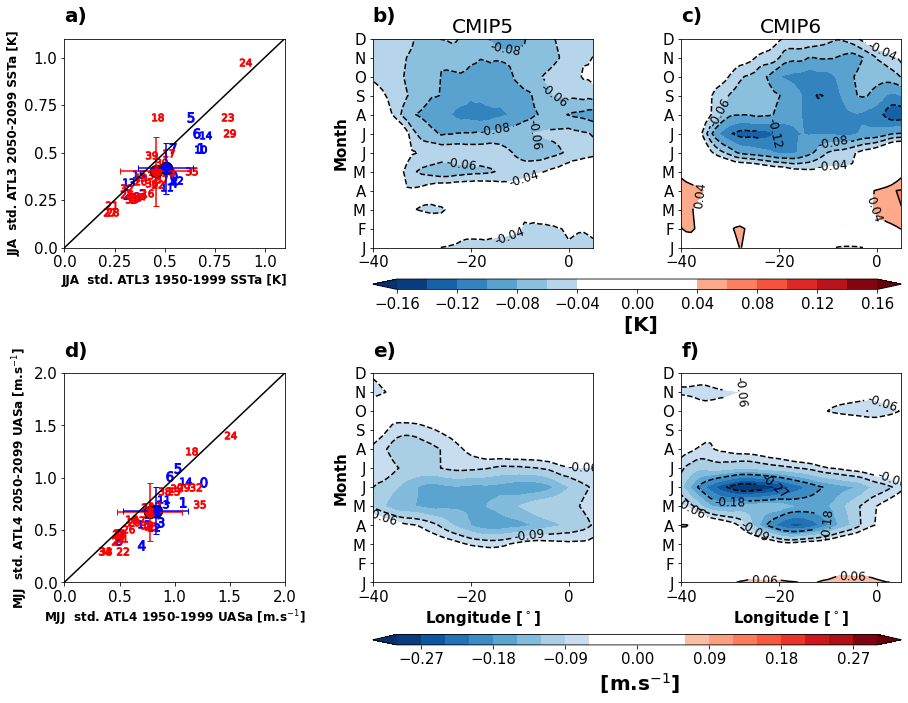

In [31]:
m = np.arange(0,12,1)
import matplotlib
month = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
#cmap = plt.cm.Reds
m_cmip6 = np.arange(0,std_ssta_atl3_hist_cmip6_jja_mean.model.shape[0],1)
m_cmip5 = np.arange(std_ssta_atl3_hist_cmip6_jja_mean.model.shape[0],
                    std_ssta_atl3_hist_cmip6_jja_mean.model.shape[0] +
                    std_ssta_atl3_hist_cmip5_jja_mean.model.shape[0],1)
cmap = plt.cm.RdYlBu_r

n=40
x = 0.8
lower = plt.cm.Blues_r(np.linspace(0, x, n))
white = np.ones((100-2*n,4))
upper = plt.cm.Reds(np.linspace(1-x, 1, n))
colors = np.vstack((lower, white, upper))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map_white', colors)


bounds0 = np.arange(-0.16,0.18,0.02)
bounds_countour = [-0.16,-0.14,-0.12,-0.08,-0.06,-0.04,0.04,0.06,0.08,0.12,0.14,0.16]
bounds00 = np.arange(-0.3,0.33,0.03)
bounds_countour1 = [-0.27,-0.18,-0.09,-0.06,0.06,0.09,0.18,0.27]
bounds1 = np.arange(0.3,0.7,0.04)
bounds2 = np.arange(0.4,1.4,0.1)
ftz =20


fig,ax = plt.subplots(2,3,figsize=[15,10])
ax = ax.ravel()



cax1 = inset_axes(ax[1],
                   width="240%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.2, 1, 1),
                   bbox_transform=ax[1].transAxes,
                   borderpad=0,
                   )

cax2 = inset_axes(ax[4],
                   width="240%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0,-0.3, 1, 1),
                   bbox_transform=ax[4].transAxes,
                   borderpad=0,
                   )

cs1 = ax[1].contour(monthly_ssta_std_model_1_CMIP5.lon,
                    m,
                    monthly_ssta_std_model_2_CMIP5.mean(dim='model').ssta_std - monthly_ssta_std_model_1_CMIP5.mean(dim='model').ssta_std,
                  levels=bounds_countour,
                  colors='black')
ax[1].clabel(cs1, inline=1, fmt='%1.2f', fontsize=12)


cs1 = ax[1].contourf(monthly_ssta_std_model_1_CMIP5.mean(dim='model').lon,
                    m,
                    monthly_ssta_std_model_2_CMIP5.mean(dim='model').ssta_std - monthly_ssta_std_model_1_CMIP5.mean(dim='model').ssta_std,
                     cmap = cmap,levels=bounds0,extend='both')
cbar = plt.colorbar(cs1, cax1, orientation='horizontal', extend='both')


ax[1].tick_params(labelsize=ftz-5)
cbar.ax.tick_params(labelsize=ftz-5)
cbar.set_label(r' [K]', size=ftz)
ax[1].set_yticks(m)
ax[1].set_yticklabels(month)
ax[1].set_title('CMIP5',fontsize=ftz)
ax[1].set_ylabel('Month',fontsize=ftz-5, fontweight='bold')



cs1 = ax[2].contour(monthly_ssta_std_model_1_CMIP6.mean(dim='model').lon,
                    m,
                    monthly_ssta_std_model_2_CMIP6.mean(dim='model').ssta_std - monthly_ssta_std_model_1_CMIP6.mean(dim='model').ssta_std,
                  levels=bounds_countour,
                  colors='black')
ax[2].clabel(cs1, inline=1, fmt='%1.2f', fontsize=12)


cs1 = ax[2].contourf(monthly_ssta_std_model_1_CMIP6.mean(dim='model').lon,
                    m,
                    monthly_ssta_std_model_2_CMIP6.mean(dim='model').ssta_std - monthly_ssta_std_model_1_CMIP6.mean(dim='model').ssta_std,
                     cmap = cmap,levels=bounds0,extend='both')

ax[2].tick_params(labelsize=ftz-5)
cbar.ax.tick_params(labelsize=ftz-5)
cbar.set_label(r' [K]', size=ftz,weight='bold')
ax[2].set_yticks(m)
ax[2].set_yticklabels(month)
ax[2].set_title('CMIP6',fontsize=ftz)


cs1 = ax[4].contour(monthly_uasa_std_model_1_CMIP5.mean(dim='model').lon,
                    m,
                    monthly_uasa_std_model_2_CMIP5.mean(dim='model').uasa_std - monthly_uasa_std_model_1_CMIP5.mean(dim='model').uasa_std,
                  levels=bounds_countour1,
                  colors='black')
ax[4].clabel(cs1, inline=1, fmt='%1.2f', fontsize=12)
cs1 = ax[4].contourf(monthly_uasa_std_model_1_CMIP5.mean(dim='model').lon,
                    m,
                    monthly_uasa_std_model_2_CMIP5.mean(dim='model').uasa_std - monthly_uasa_std_model_1_CMIP5.mean(dim='model').uasa_std,
                     cmap = cmap,levels=bounds00,extend='both')

ax[4].tick_params(labelsize=ftz-5)

ax[4].set_yticks(m)
ax[4].set_yticklabels(month)
ax[4].set_xlabel('Longitude [$^\circ$]',fontsize=ftz-5,fontweight='bold')
ax[4].set_ylabel('Month',fontsize=ftz-5, fontweight='bold')


cs1 = ax[5].contour(monthly_uasa_std_model_1_CMIP6.mean(dim='model').lon,
                    m,
                    monthly_uasa_std_model_2_CMIP6.mean(dim='model').uasa_std - monthly_uasa_std_model_1_CMIP6.mean(dim='model').uasa_std,
                  levels=bounds_countour1,
                  colors='black')
ax[5].clabel(cs1, inline=1, fmt='%1.2f', fontsize=12)
cs1 = ax[5].contourf(monthly_uasa_std_model_1_CMIP6.mean(dim='model').lon,
                    m,
                    monthly_uasa_std_model_2_CMIP6.mean(dim='model').uasa_std - monthly_uasa_std_model_1_CMIP6.mean(dim='model').uasa_std,
                     cmap = cmap,levels=bounds00,extend='both')
cbar2 = plt.colorbar(cs1, cax2, orientation='horizontal', extend='both')


ax[5].tick_params(labelsize=ftz-5)
cbar2.ax.tick_params(labelsize=ftz-5)
cbar2.set_label(r' [m.s$^{-1}$]', size=ftz,weight='bold')
ax[5].set_yticks(m)
ax[5].set_yticklabels(month)
ax[5].set_xlabel('Longitude [$^\circ$]',fontsize=ftz-5,fontweight='bold')


ax[0].scatter(std_ssta_atl3_hist_cmip6_jja_ensmean.ssta_std,
              std_ssta_atl3_ssp5_cmip6_jja_ensmean.ssta_std,
              color='blue',
              s=150,edgecolor='black')

for i in range(std_ssta_atl3_hist_cmip6_jja_mean.ssta_std.shape[0]):
    if i < 10:

        ax[0].scatter(std_ssta_atl3_hist_cmip6_jja_mean.ssta_std[i],
           std_ssta_atl3_ssp5_cmip6_jja_mean.ssta_std[i],color='blue',marker=r"$ {} $".format(m_cmip6[i]),s=100)
    else:
        ax[0].scatter(std_ssta_atl3_hist_cmip6_jja_mean.ssta_std[i],
           std_ssta_atl3_ssp5_cmip6_jja_mean.ssta_std[i],color='blue',marker=r"$ {} $".format(m_cmip6[i]),s=150)


for j in range(std_ssta_atl3_hist_cmip5_jja_mean.ssta_std.shape[0]):

    ax[0].scatter(std_ssta_atl3_hist_cmip5_jja_mean.ssta_std[j],
          std_ssta_atl3_ssp5_cmip5_jja_mean.ssta_std[j],color='red',marker=r"$ {} $".format(m_cmip5[j]),s=150)

ax[0].set_xlabel('JJA  std. ATL3 1950-1999 SSTa [K]',fontsize=ftz-8,fontweight='bold')
ax[0].set_ylabel('JJA  std. ATL3 2050-2099 SSTa [K]',fontsize=ftz-8,fontweight='bold')
ax[0].set_xlim([0,1.1])
ax[0].set_ylim([0,1.1])
x = np.arange(-0.1,2)
y=x
ax[0].plot(x,y,color='black')
ax[0].set_xticks(np.arange(0,1.25,0.25))
ax[0].set_xticklabels(np.arange(0,1.25,0.25))
ax[0].set_yticks(np.arange(0,1.25,0.25))
ax[0].set_yticklabels(np.arange(0,1.25,0.25))

ax[0].tick_params(labelsize=ftz-5)
ax[0].scatter(std_ssta_atl3_hist_cmip6_jja_ensmean.ssta_std,
              std_ssta_atl3_ssp5_cmip6_jja_ensmean.ssta_std,
              color='blue',
              s=150,edgecolor='black')

ax[0].scatter(std_ssta_atl3_hist_cmip5_jja_ensmean.ssta_std,
              std_ssta_atl3_ssp5_cmip5_jja_ensmean.ssta_std,
              color='red',
              s=150,edgecolor='black')
ax[0].errorbar(std_ssta_atl3_hist_cmip5_jja_ensmean.ssta_std,
              std_ssta_atl3_ssp5_cmip5_jja_ensmean.ssta_std,
             xerr=std_ssta_atl3_hist_cmip5_jja_mean.ssta_std.std(dim='model'),
             yerr=std_ssta_atl3_ssp5_cmip5_jja_mean.ssta_std.std(dim='model'),
               color='red',fmt='o',capsize=3)


ax[0].errorbar(std_ssta_atl3_hist_cmip6_jja_ensmean.ssta_std,
              std_ssta_atl3_ssp5_cmip6_jja_ensmean.ssta_std,
             xerr=std_ssta_atl3_hist_cmip6_jja_mean.ssta_std.std(dim='model'),
             yerr=std_ssta_atl3_ssp5_cmip6_jja_mean.ssta_std.std(dim='model'),
               color='blue',fmt='o',capsize=3)



for i in range(std_uasa_atl4_hist_cmip6_mjj_mean.uasa_std.shape[0]):
    if i < 10:

        ax[3].scatter(std_uasa_atl4_hist_cmip6_mjj_mean.uasa_std[i],
           std_uasa_atl4_ssp5_cmip6_mjj_mean.uasa_std[i],color='blue',marker=r"$ {} $".format(m_cmip6[i]),s=100)
    else:
        ax[3].scatter(std_uasa_atl4_hist_cmip6_mjj_mean.uasa_std[i],
           std_uasa_atl4_ssp5_cmip6_mjj_mean.uasa_std[i],color='blue',marker=r"$ {} $".format(m_cmip6[i]),s=150)


for j in range(std_uasa_atl4_hist_cmip5_mjj_mean.uasa_std.shape[0]):

    ax[3].scatter(std_uasa_atl4_hist_cmip5_mjj_mean.uasa_std[j],
          std_uasa_atl4_ssp5_cmip5_mjj_mean.uasa_std[j],color='red',marker=r"$ {} $".format(m_cmip5[j]),s=150)

ax[3].set_xlabel('MJJ  std. ATL4 1950-1999 UASa [m.s$^{-1}$]',fontsize=ftz-8,fontweight='bold')
ax[3].set_ylabel('MJJ  std. ATL4 2050-2099 UASa [m.s$^{-1}$]',fontsize=ftz-8,fontweight='bold')
ax[3].set_xlim([0,1.8])
ax[3].set_ylim([0,1.8])
ax[3].set_xticks(np.arange(0,2.5,0.5))
ax[3].set_xticklabels(np.arange(0,2.5,0.5))
ax[3].set_yticks(np.arange(0,2.5,0.5))
ax[3].set_yticklabels(np.arange(0,2.5,0.5))
x = np.arange(-0.1,3)
y=x
ax[3].plot(x,y,color='black')

ax[3].tick_params(labelsize=ftz-5)


ax[3].scatter(std_uasa_atl4_hist_cmip6_mjj_ensmean.uasa_std,
              std_uasa_atl4_ssp5_cmip6_mjj_ensmean.uasa_std,
              color='blue',
              s=150,edgecolor='black')

ax[3].scatter(std_uasa_atl4_hist_cmip5_mjj_ensmean.uasa_std,
              std_uasa_atl4_ssp5_cmip5_mjj_ensmean.uasa_std,
              color='red',
              s=150,edgecolor='black')


ax[3].errorbar(std_uasa_atl4_hist_cmip5_mjj_ensmean.uasa_std,
              std_uasa_atl4_ssp5_cmip5_mjj_ensmean.uasa_std,
             xerr=std_uasa_atl4_hist_cmip5_mjj_mean.uasa_std.std(dim='model'),
             yerr=std_uasa_atl4_ssp5_cmip5_mjj_mean.uasa_std.std(dim='model'),color='red',fmt='o',capsize=3)


ax[3].errorbar(std_uasa_atl4_hist_cmip6_mjj_ensmean.uasa_std,
              std_uasa_atl4_ssp5_cmip6_mjj_ensmean.uasa_std,
             xerr=std_uasa_atl4_hist_cmip5_mjj_mean.uasa_std.std(dim='model'),
             yerr=std_uasa_atl4_ssp5_cmip6_mjj_mean.uasa_std.std(dim='model'),color='blue',fmt='o',capsize=3)


plt.subplots_adjust( hspace=0.6,
                    wspace=0.4)


ax[0].text(0, 1.08, string.ascii_lowercase[0]+')', transform=ax[0].transAxes,
        size=20, weight='bold')
ax[1].text(0, 1.08, string.ascii_lowercase[1]+')', transform=ax[1].transAxes,
        size=20, weight='bold')
ax[2].text(0, 1.08, string.ascii_lowercase[2]+')', transform=ax[2].transAxes,
        size=20, weight='bold')
ax[3].text(0, 1.08, string.ascii_lowercase[3]+')', transform=ax[3].transAxes,
         size=20, weight='bold')
ax[4].text(0, 1.08, string.ascii_lowercase[4]+')', transform=ax[4].transAxes,
        size=20, weight='bold')
ax[5].text(0, 1.08, string.ascii_lowercase[5]+')', transform=ax[5].transAxes,
         size=20, weight='bold')

#plt.savefig(path_fig + 'figure_01.pdf',
#            dpi=300, bbox_inches='tight')